학습목표:
    1. 현업의 데이터를 사용하여 데이터 시각화를 실습한다.
    2. 데이터를 가공, 처리하여 시각화를 진행한다.
    

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [9]:
df=pd.read_excel('./네이버보고서.xls',skiprows=[0])

In [20]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [10]:
# 노출수 칼럼 시각화
# 데이터 프레임 시각화 <-> 시리즈 시각화
# type 함수
type(df['노출수'])

pandas.core.series.Series

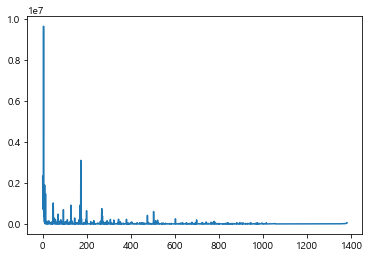

In [11]:
#plotting
df['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터 시각화 진행
    1. as-is : index를 기준으로 출력( 그래프의 x축이 시리즈의 인덱스)
    2. to-be : 정렬된 value를 기준으로 출력
         - 2-1. 시리즈의 value 를 수치 순서대로 오름차순 정렬
         - 2-2. 정렬된 데이터의 형태대로 iindex 재생성 후 시각화

In [12]:
# 2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬
# 노출수 칼럼, sort_values()
imp_sort=df['노출수'].sort_values()
imp_sort

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [13]:
# reset_index() - 인덱스 재생성, 기존 인덱스를 데이터프레임의 열로 반환
imp_sort= imp_sort.reset_index()
# 즉 오름차순 한대로 인덱스를 재생성시킨다
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [14]:
# drop ('삭제할 인덱스명', axis=1 ) 열 기준
# 원본에 적용하기 -> inplace=True
imp_sort.drop('index',axis=1,inplace=True)
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


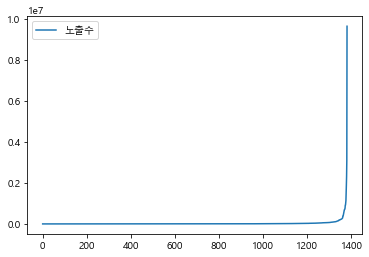

In [15]:
imp_sort.plot()
plt.show()

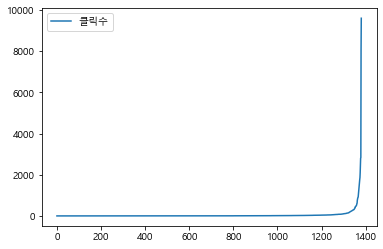

In [16]:
# 클릭수칼럼 시각화
# sort_values(), reset_index(), drop('index',axis=1),plot
(((df['클릭수'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

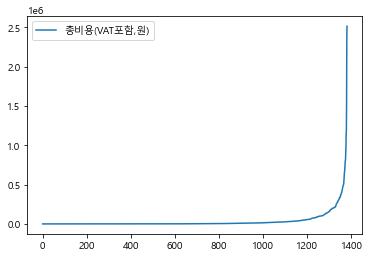

In [19]:
# 총비용칼럼 시각화
# 위 코드에서 컬러명만 변경
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index',axis=1)).plot()
plt.show()

### 중점관리키워드 추출
- 노출수, 클릭수 기준 상위 5% 추출하기
    1. 95 백분위수 찾기 (quantile 함수 사용)
    2. 95 백분위수 이상(상위 5%)의 노출수 추출
    3. 상위 5%에 해당하는 키워드 추출

In [21]:
# 노출수 칼럼 imp변수에 할당
imp = df['노출수']

In [22]:
# 1. 95 백분위수 찾기
# quantile - 분위수 출력(default : 2사분위수 (중앙값))
imp.quantile()

3805.0

In [23]:
# median - 중앙값
imp.median()

3805.0

In [26]:
# quantile(0) -> 최소값
print(imp.quantile(0))
print(imp.min())

1001.0
1001


In [25]:
# quantile(1) -> 최대값
print(imp.quantile(1))
print(imp.max())

9626374.0
9626374


In [27]:
# 95 백분위수 = quantile(0.95)
imp.quantile(0.95)

82858.0

In [28]:
#2. 95백분위수 이상 상위 5% 의 노출수 추출
# series[condition]
imp=imp[imp>=imp.quantile(0.95)]
imp

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
698     196862
741      94933
763      82858
777     126393
780      90041
Name: 노출수, Length: 70, dtype: int64

3. 상위 5%에 해당하는 키워드 추출
    - 기존 상위 노출수 추출과정
        - A. as-is : 데이터프레임의 기본숫자인덱스
        - B. to-be : 데이터프레임의 인덱스를 '키워드'로 재설정



In [29]:
# 실습예재 원본
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [31]:
# 데이터프레임의 인덱스를 키워드로 변경
# set_index('키워드')
df_index=df.set_index('키워드')
df_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.0,0.414149,261.549448,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.0,1.049915,295.974808,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.0,0.028475,4841.663580,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.6,0.268489,630.593475,1175174
HTML,3. html,9626374,813.6,0.008452,1408.435349,1145903
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0.0,0.000000,0.000000,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0.0,0.000000,0.000000,0
LTV,마케팅KPI수립,32602,0.0,0.000000,0.000000,0


In [32]:
# df_index 에서 imp 변수 생성 및 quanntile(0.95)
imp=df_index['노출수']

In [33]:
# imp 변수 출력, 노출수 상위 5% 키워드 추출
imp=imp[imp>=imp.quantile(0.95)]

In [34]:
imp

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64

In [35]:
# df_index에서 클릭수 상위 5% 키워드 추출
clk=df_index['클릭수']
clk=clk[clk>=clk.quantile(0.95)]
clk

키워드
-          9606.0
-          8058.0
일러스트        324.0
-          1863.6
HTML        813.6
            ...  
재태크         126.0
모스자격증       198.0
펀드하는법       248.4
채권투자        135.6
주식투자하는법     120.0
Name: 클릭수, Length: 70, dtype: float64

### # 중점관리 키워드 선별
    - 노출수와 클릭수 모두 95백분위수 이상

### # 조건이 여러개인 경우
    - 데이터프레임[(조건문) & (조건문)]

In [36]:
# df_index 에서 imp, clk 변수 생성
imp=df_index['노출수']
clk=df_index['클릭수']


In [38]:
# 노출수와 클리수 모두 상위 5% 추출
result= df_index[(imp>=imp.quantile(0.05)) & (clk>=clk.quantile(0.95))]
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.0,0.414149,261.549448,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.0,1.049915,295.974808,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.0,0.028475,4841.663580,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.6,0.268489,630.593475,1175174
HTML,3. html,9626374,813.6,0.008452,1408.435349,1145903
...,...,...,...,...,...,...
재태크,올인원 패키지 : 투자_파워콘텐츠,3446,126.0,3.656413,208.650794,26290
모스자격증,올인원 패키지 : 업무자동화_VBA,16863,198.0,1.174168,129.111111,25564
펀드하는법,올인원 패키지 : 투자_파워콘텐츠,3026,248.4,8.208857,98.840580,24552


In [39]:
# index - 중점관리 키워드 출력
result.index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '마케팅교육', '인스타팔로워늘리기', '블록체인', '엑셀', '엑셀배우기', '엑셀자격증', '인터넷쇼핑몰창업',
       '파이썬인강', '코딩인강', '-', '포토샵', '영상편집', '컴퓨터활용능력', '인스타팔로워', '포토샵배우기',
       '이더리움', '머신러닝', '컴퓨터활용능력2급', '프로그래밍인강', '컴퓨터활용능력1급', '컴퓨터자격증종류', '포토샵',
       '-', '프리미어프로', '일러스트레이터', '경매', '폰트', '스케치', '블록체인', '컴퓨터자격증', '포토샵',
       '포토샵자격증', '엑셀학원', '재테크', 'MOS자격증', '컴활1급', '에프터이펙트', '포토샵학원', '글씨체',
       '마케팅자격증', '컴활1급실기', '주식', '컴활2급실기', '-', '컴활', '컴활2급', '한글폰트', '마블',
       '바이럴마케팅', '영상편집자격증', '인디자인', '포토샵강좌', '펀드', '투자', '일러스트레이터강좌', '재태크',
       '모스자격증', '펀드하는법', '채권투자', '주식투자하는법'],
      dtype='object', name='키워드')

### # 저효율 키워드 선별

- 노출수, 클릭수 높지 않은데도 불구하고, 비용이 많이 발생하는 키워드
    1. 노출수 95백분위수 미만
    2. 클릭수 95 백분위수 미만
    3. 총비용 85백분위수 이상
    4. 총비용 95백분위수 미만
### # 조건이 여러개일 경우
    - 데이터프레임 [ (조건문) & (조건문) ]

In [40]:
# df_index 로 cost 변수 생성
cost = df_index['총비용(VAT포함,원)']

In [41]:
result=df_index[(imp<imp.quantile(0.95)) & (clk<clk.quantile(0.95)) & (cost>=cost.quantile(0.85)) & (cost<cost.quantile(0.95))]

In [44]:
# 저효율 키워드 출력
result.index

Index(['온라인마케팅교육', '온라인마케팅', '어플제작비용', '부동산경매', '퍼포먼스마케팅', '블록체인', 'C++',
       '게임만드는프로그램', '엑셀배우기', '앱만들기', '영상제작', '쇼핑몰제작', '에프터이펙트', '어플리케이션제작',
       '강남빌딩매매', '웹디자인', '디지털마케팅', '포토샵강의', '구글애널리틱스자격증', 'PYTHON', '페이스북광고',
       '유튜브마케팅', '게임제작', '부동산투자', '마케팅전략', 'PYTHON', '홈페이지만들기', 'B2B사이트',
       'JAVASCRIPT', '파이썬강좌', '인스타그램광고', '동영상제작', 'SEO', '쇼핑몰창업', '인터넷쇼핑몰',
       '게임프로그래밍학원', '프로그래밍', '서울빌딩매매', '데이터사이언스', '모바일게임제작', '엑셀학원',
       '유튜브크리에이터', '엑셀VBA', '영상편집학원', '텐서플로우', '쇼핑몰홈페이지제작', '엑셀교육', '그로스해킹',
       '게임개발', '광고대행사', '통계학원', '모바일앱개발', '안드로이드앱만들기', '파이썬기초', '하이브리드앱',
       '온라인마케팅', '인디자인', '검색엔진최적화', '엑셀실무', '인터넷쇼핑몰제작', '상가빌딩매매', '퍼포먼스마케팅',
       '쇼핑몰', 'UX디자인', '유니티강좌', 'VBA', '코딩이란', 'SNS마케팅', 'GA자격증', '콘텐츠제작',
       '구글애널리틱스', 'UI디자인', '1인미디어', '포토샵자격증', '하이브리드앱', '포토샵자격증', '브랜드네이밍',
       '리플렛디자인', '데이터사이언티스트', '유니티3D', '자바스크립트', '일러스트레이터강좌', '데이터분석준전문가',
       '유튜브편집', '모션그래픽', '리플렛디자인', 'SPRING', '어도비일러스트레이터', 'SNS광고', '쇼핑몰촬영',
       '브랜드마케팅', '데이터분